In [2]:
# Exercise 1
import numpy as np
data = np.loadtxt('smoking.txt')
nonsmokers = data[np.where(data[:,4] == 0)] #select all rows for nonsmokers
smokers = data[np.where(data[:,4] == 1)] #select all rows for smokers

def avg_FEV1(data):
    '''Calculates average FEV1 value for an array'''
    fev1 = data[:,1] #Select the column for fev1 values
    avg = np.mean(fev1)
    return avg

print("Average FEV1 for nonsmokers: " + str(avg_FEV1(nonsmokers)))
print("Average FEV1 for smokers: " + str(avg_FEV1(smokers)))

Average FEV1 for nonsmokers: 2.5661426146010187
Average FEV1 for smokers: 3.2768615384615383


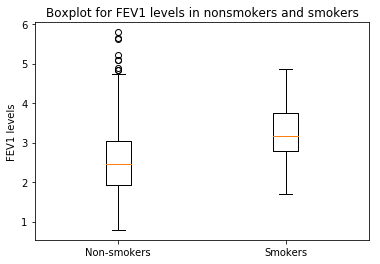

In [4]:
# Exercise 2
import matplotlib.pyplot as plt
nonsmokers_fev1 = nonsmokers[:,1] #select fev1 values from the nonsmoker array
smokers_fev1 = smokers[:,1] #select fev1 values from the smoker array
labels = ["Non-smokers", "Smokers"]
plt.boxplot([nonsmokers_fev1, smokers_fev1], labels = labels)
plt.title('Boxplot of FEV1 levels in nonsmokers and smokers')
plt.ylabel('FEV1 levels')
plt.show()

In [ ]:
# Exercise 3
import scipy.stats as sp

def df(sample1, sample2):
    '''Calculate the degree of freedom'''
    n1 = len(sample1)
    n2 = len(sample2)
    var1 = np.var(sample1)
    var2 = np.var(sample2)
    num = ((var1/n1) + (var2/n2))**2
    den1 = (var1**2)/((n1-1)*n1**2)
    den2 = (var2**2)/((n2-1)*n2**2)
    df = np.floor(num/(den1+den2))
    return df

def ttest(sample1, sample2, alpha = 0.05):
    '''Returns whether the null hypothesis isrejected or not, reject = True'''
    n1 = len(sample1)
    n2 = len(sample2)
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    var1 = np.var(sample1)
    var2 = np.var(sample2)
    #calculate t statistic
    tval = (mean1 - mean2)/np.sqrt((var1/n1)+(var2/n2))
    #calculate degree of freedom
    k = df(sample1, sample2)
    #calculate p value
    pval = 2*sp.t.cdf(-abs(tval), k)
    
    print("T value: "+ str(tval))
    print("P value: "+ str(pval))
    print("Degrees of freedom: "+ str(k))
    
    if pval < alpha:
        print("The null hypothesis is rejected at alpha = " + str(alpha))
        return True
    else:
        print("The null hypothesis is not rejected at alpha = " + str(alpha))
        return False

#test
ttest(smokers_fev1, nonsmokers_fev1)

In [ ]:
# Exercise 4
# Correlation
pear = sp.pearsonr(data[:,0],data[:,1])[0]
spear = sp.spearmanr(data[:,0],data[:,1])[0]
print("Pearson coefficient: " + str(pear))
print("Spearman coefficient: " + str(spear))

# 2D plot
nonsmokers_age = nonsmokers[:,0]
smokers_age = smokers[:,0]
plt.scatter(nonsmokers_age, nonsmokers_fev1, alpha=0.7, label='Non-smokers')
plt.scatter(smokers_age, smokers_fev1, alpha=0.7, color = "red", label = 'Smokers')
plt.title('Age versus FEV1 levels in Smokers and Non-smokers')
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Exercise 5
plt.hist(nonsmokers_age, alpha=0.8, label='Non-smokers')
plt.hist(smokers_age, alpha=0.8, color = "red", label = 'Smokers')
plt.title('Histogram of the age of Smokers and Non-smokers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()